# Spaceship Titanic

### Predict which passengers are transported to an alternate dimension

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

![](/Users/amith/Desktop/aaaa.jpeg "optional-title")

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

## Dataset Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

## File and Data Field Descriptions

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

**sample_submission.csv** - A submission file in the correct format.

**PassengerId** - Id for each passenger in the test set.

**Transported** - The target. For each passenger, predict either True or False.

### Importing all packages

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from sklearn.linear_model import *
from math import *
from sklearn.ensemble import *
from sklearn.feature_selection import *
from sklearn.feature_extraction import *
from sklearn.naive_bayes import *
from sklearn.discriminant_analysis import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.neighbors import *
from sklearn.cluster import *

### Importing all datasets

In [195]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

### Showing the first 5 elements in the training dataset

In [196]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Showing the first 5 elements in the testing dataset

In [197]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Exploratory Data Analysis for the training dataset

In [198]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [199]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [200]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [201]:
train_1 = df_train.drop("Name",axis=1,inplace=False)
train_1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [202]:
train_1.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [203]:
train_2 = train_1.copy()
train_2 = train_2.dropna(subset=["HomePlanet"],axis=0,inplace=False)
train_2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [204]:
train_2.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Cabin           193
Destination     178
Age             177
VIP             200
RoomService     175
FoodCourt       181
ShoppingMall    201
Spa             180
VRDeck          187
Transported       0
dtype: int64

In [205]:
train_3 = train_2.copy()
train_3["CryoSleep"] = train_3["CryoSleep"].fillna(False)
train_3.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [206]:
train_3.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           193
Destination     178
Age             177
VIP             200
RoomService     175
FoodCourt       181
ShoppingMall    201
Spa             180
VRDeck          187
Transported       0
dtype: int64

In [207]:
cabin = pd.DataFrame(columns=["Cabin Deck","Cabin Number","Cabin Side"])
deck = []
num = []
side = []
for i in list(train_3["Cabin"].to_numpy()):
    s = str(i)
    stri = s.split("/")
    if len(stri)<3:
        stri.insert(0,np.nan)
        stri[1] = np.nan
        stri.insert(2,np.nan)
    deck.append(stri[0])
    num.append(stri[1])
    side.append(stri[2])
cabin["Cabin Deck"] = deck
cabin["Cabin Number"] = num
cabin["Cabin Side"] = side

cabin["Cabin Deck"].value_counts()

F    2724
G    2498
E     853
B     766
C     734
D     468
A     252
T       4
Name: Cabin Deck, dtype: int64

In [208]:
cabin[["Cabin Number","Cabin Side"]][cabin["Cabin Deck"]=="T"]

,Cabin Number,Cabin Side
2206,1,P
2670,2,P
2698,3,P
4461,2,S


In [209]:
cabin_1 = cabin.copy()
cabin_1["Cabin Deck"] = cabin_1["Cabin Deck"].fillna("T")
arr = cabin_1[cabin_1["Cabin Number"].isna()].index.values
arr_1 = arr[:-1]
arr_2 = arr[-1]
arr_1 = arr_1.reshape(int(len(arr_1)/4),4)
arr_1

array([[  15,   92,  102,  219],
       [ 223,  246,  255,  267],
       [ 274,  287,  306,  309],
       [ 336,  403,  424,  443],
       [ 449,  472,  645,  659],
       [ 671,  679,  693,  764],
       [ 767,  772,  804,  847],
       [ 904,  922,  925,  935],
       [ 955, 1000, 1020, 1029],
       [1031, 1046, 1105, 1131],
       [1190, 1203, 1296, 1331],
       [1348, 1429, 1434, 1445],
       [1458, 1486, 1525, 1553],
       [1558, 1575, 1589, 1645],
       [1733, 1743, 1822, 1915],
       [1927, 1937, 1967, 2028],
       [2075, 2254, 2264, 2280],
       [2310, 2329, 2373, 2448],
       [2644, 2662, 2697, 2749],
       [2761, 2794, 2835, 2879],
       [2970, 2974, 3191, 3203],
       [3204, 3214, 3232, 3254],
       [3268, 3306, 3379, 3412],
       [3416, 3473, 3475, 3616],
       [3619, 3654, 3665, 3684],
       [3768, 3794, 3825, 3917],
       [3930, 3965, 4000, 4024],
       [4069, 4241, 4256, 4269],
       [4288, 4297, 4314, 4393],
       [4411, 4424, 4441, 4558],
       [46

In [210]:
arr_2

8458

In [211]:
ctr = 4
for iter in arr_1:

    cabin_1.loc[iter[0],"Cabin Number"] = ctr
    cabin_1.loc[iter[0],"Cabin Side"] = "P"
    
    cabin_1.loc[iter[1],"Cabin Number"] = ctr + 1
    cabin_1.loc[iter[1],"Cabin Side"] = "S"
    
    cabin_1.loc[iter[2],"Cabin Number"] = ctr + 2
    cabin_1.loc[iter[2],"Cabin Side"] = "P"
    
    cabin_1.loc[iter[3],"Cabin Number"] = ctr + 3
    cabin_1.loc[iter[3],"Cabin Side"] = "S"
    
    ctr += 1
    
cabin_1.loc[arr_2,"Cabin Number"] = ctr + 1
cabin_1.loc[arr_2,"Cabin Side"] = "P"

In [212]:
cabin_1.isna().sum()

Cabin Deck      0
Cabin Number    0
Cabin Side      0
dtype: int64

In [213]:
cabin_2 = cabin_1.reset_index()
cabin_2.head()

,index,Cabin Deck,Cabin Number,Cabin Side
0,0,B,0,P
1,1,F,0,S
2,2,A,0,S
3,3,A,0,S
4,4,F,1,S


In [214]:
train_4 = train_3.reset_index()
train_4.head()

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [215]:
train_5 = pd.merge(left=train_4,right=cabin_2,how="inner",on="index")
train_5.drop("Cabin",axis=1,inplace=True)
train_5 = train_5[["index","PassengerId","HomePlanet","Cabin Deck","Cabin Number","Cabin Side","CryoSleep","Destination","Age","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Transported"]]
train_5.isna().sum()

index             0
PassengerId       0
HomePlanet        0
Cabin Deck        0
Cabin Number      0
Cabin Side        0
CryoSleep         0
Destination     174
Age             176
VIP             196
RoomService     172
FoodCourt       179
ShoppingMall    192
Spa             175
VRDeck          184
Transported       0
dtype: int64

In [216]:
train_5["Destination"].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [217]:
train_6 = train_5.dropna(subset=["Destination"],axis=0,inplace=False)
train_6.head()

,index,PassengerId,HomePlanet,Cabin Deck,Cabin Number,Cabin Side,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,0001_01,Europa,B,0,P,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,0002_01,Earth,F,0,S,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,2,0003_01,Europa,A,0,S,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,3,0003_02,Europa,A,0,S,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,4,0004_01,Earth,F,1,S,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [218]:
train_6.isna().sum()

index             0
PassengerId       0
HomePlanet        0
Cabin Deck        0
Cabin Number      0
Cabin Side        0
CryoSleep         0
Destination       0
Age             173
VIP             193
RoomService     169
FoodCourt       173
ShoppingMall    187
Spa             172
VRDeck          182
Transported       0
dtype: int64

In [219]:
train_7 = train_6.copy()
train_7["Age"] = train_7["Age"].median()
train_7["VIP"] = train_7["VIP"].fillna(False,inplace=False)
train_7["RoomService"] = train_7["RoomService"].fillna(0.0,inplace=False)
train_7["FoodCourt"] = train_7["FoodCourt"].fillna(0.0,inplace=False)
train_7["ShoppingMall"] = train_7["ShoppingMall"].fillna(0.0,inplace=False)
train_7["Spa"] = train_7["Spa"].fillna(0.0,inplace=False)
train_7["VRDeck"] = train_7["VRDeck"].fillna(0.0,inplace=False)
train_7.head()

,index,PassengerId,HomePlanet,Cabin Deck,Cabin Number,Cabin Side,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,0001_01,Europa,B,0,P,False,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,0002_01,Earth,F,0,S,False,TRAPPIST-1e,27.0,False,109.0,9.0,25.0,549.0,44.0,True
2,2,0003_01,Europa,A,0,S,False,TRAPPIST-1e,27.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,3,0003_02,Europa,A,0,S,False,TRAPPIST-1e,27.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,4,0004_01,Earth,F,1,S,False,TRAPPIST-1e,27.0,False,303.0,70.0,151.0,565.0,2.0,True


In [220]:
train_7.isna().sum()

index           0
PassengerId     0
HomePlanet      0
Cabin Deck      0
Cabin Number    0
Cabin Side      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [221]:
vcount = train_7["Transported"].value_counts()
vcount*100/len(train_7)

True     50.320118
False    49.679882
Name: Transported, dtype: float64

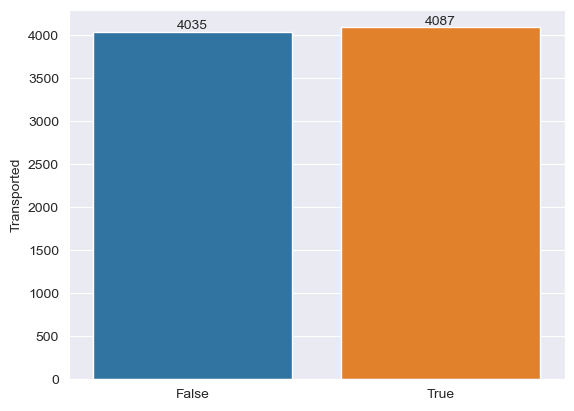

In [222]:
plot = sns.barplot(x=vcount.index,y=vcount)
for i in plot.containers:
    plot.bar_label(i,)

### Exploratory Data Analysis for the testing dataset

In [223]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [224]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [225]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [226]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [227]:
test_1 = df_test.drop("Name", axis=1, inplace=False)
test_1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [228]:
test_1.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [229]:
test_2 = test_1.copy()
test_2 = test_2.dropna(subset=["HomePlanet"], axis=0, inplace=False)
test_2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [230]:
test_2.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep        90
Cabin            99
Destination      90
Age              88
VIP              93
RoomService      82
FoodCourt       104
ShoppingMall     95
Spa              95
VRDeck           78
dtype: int64

In [231]:
test_3 = test_2.copy()
test_3["CryoSleep"] = test_3["CryoSleep"].fillna(False)
test_3.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [232]:
test_3.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin            99
Destination      90
Age              88
VIP              93
RoomService      82
FoodCourt       104
ShoppingMall     95
Spa              95
VRDeck           78
dtype: int64

In [233]:
cabin = pd.DataFrame(columns=["Cabin Deck", "Cabin Number", "Cabin Side"])
deck = []
num = []
side = []
for i in list(test_3["Cabin"].to_numpy()):
    s = str(i)
    stri = s.split("/")
    if len(stri) < 3:
        stri.insert(0, np.nan)
        stri[1] = np.nan
        stri.insert(2, np.nan)
    deck.append(stri[0])
    num.append(stri[1])
    side.append(stri[2])
cabin["Cabin Deck"] = deck
cabin["Cabin Number"] = num
cabin["Cabin Side"] = side

cabin["Cabin Deck"].value_counts()

F    1415
G    1202
E     435
B     358
C     347
D     234
A      94
T       6
Name: Cabin Deck, dtype: int64

In [234]:
cabin[["Cabin Number", "Cabin Side"]][cabin["Cabin Deck"] == "T"]
cabin_1 = cabin.copy()
cabin_1["Cabin Deck"] = cabin_1["Cabin Deck"].fillna("T")
arr = cabin_1[cabin_1["Cabin Number"].isna()].index.values
arr_1 = arr[:-3]
arr_2 = arr[-3:]
arr_1 = arr_1.reshape(int(len(arr_1) / 4), 4)

In [235]:
arr_1

array([[  18,   99,  135,  147],
       [ 180,  184,  241,  263],
       [ 342,  356,  420,  537],
       [ 704,  723,  813,  819],
       [1003, 1013, 1029, 1080],
       [1136, 1156, 1175, 1183],
       [1222, 1307, 1449, 1525],
       [1534, 1557, 1638, 1712],
       [1728, 1825, 1880, 1984],
       [1989, 1998, 2091, 2173],
       [2204, 2226, 2239, 2250],
       [2265, 2282, 2296, 2326],
       [2359, 2389, 2430, 2438],
       [2446, 2484, 2592, 2690],
       [2722, 2811, 2848, 2900],
       [2907, 2911, 2953, 2955],
       [2958, 2991, 3033, 3096],
       [3138, 3140, 3177, 3181],
       [3216, 3250, 3301, 3322],
       [3344, 3349, 3394, 3477],
       [3508, 3552, 3571, 3572],
       [3701, 3721, 3784, 3805],
       [4012, 4044, 4056, 4090],
       [4092, 4097, 4123, 4161]])

In [236]:
arr_2

array([4162, 4171, 4186])

In [237]:
ctr = 4
for iter in arr_1:
    cabin_1.loc[iter[0], "Cabin Number"] = ctr
    cabin_1.loc[iter[0], "Cabin Side"] = "P"

    cabin_1.loc[iter[1], "Cabin Number"] = ctr + 1
    cabin_1.loc[iter[1], "Cabin Side"] = "S"

    cabin_1.loc[iter[2], "Cabin Number"] = ctr + 2
    cabin_1.loc[iter[2], "Cabin Side"] = "P"

    cabin_1.loc[iter[3], "Cabin Number"] = ctr + 3
    cabin_1.loc[iter[3], "Cabin Side"] = "S"

    ctr += 1

In [238]:
cabin_1.loc[arr_2[0], "Cabin Number"] = ctr + 1
cabin_1.loc[arr_2[0], "Cabin Side"] = "P"
cabin_1.loc[arr_2[1], "Cabin Number"] = ctr + 2
cabin_1.loc[arr_2[1], "Cabin Side"] = "S"
cabin_1.loc[arr_2[2], "Cabin Number"] = ctr + 3
cabin_1.loc[arr_2[2], "Cabin Side"] = "P"

In [239]:
cabin_1.isna().sum()

Cabin Deck      0
Cabin Number    0
Cabin Side      0
dtype: int64

In [240]:
cabin_2 = cabin_1.reset_index()
cabin_2.head()

,index,Cabin Deck,Cabin Number,Cabin Side
0,0,G,3,S
1,1,F,4,S
2,2,C,0,S
3,3,C,1,S
4,4,F,5,S


In [241]:
test_4 = test_3.reset_index()
test_4.head()

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [242]:
test_5 = pd.merge(left=test_4, right=cabin_2, how="inner", on="index")
test_5.drop("Cabin", axis=1, inplace=True)
test_5 = test_5[
    ["index", "PassengerId", "HomePlanet", "Cabin Deck", "Cabin Number", "Cabin Side", "CryoSleep", "Destination",
     "Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
test_5.isna().sum()

index             0
PassengerId       0
HomePlanet        0
Cabin Deck        0
Cabin Number      0
Cabin Side        0
CryoSleep         0
Destination      87
Age              84
VIP              91
RoomService      79
FoodCourt       103
ShoppingMall     90
Spa              95
VRDeck           77
dtype: int64

In [243]:
test_5["Destination"].unique()

array(['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', nan], dtype=object)

In [244]:
test_6 = test_5.dropna(subset=["Destination"], axis=0, inplace=False)
test_6.head()

,index,PassengerId,HomePlanet,Cabin Deck,Cabin Number,Cabin Side,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,0013_01,Earth,G,3,S,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,1,0018_01,Earth,F,4,S,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,2,0019_01,Europa,C,0,S,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,3,0021_01,Europa,C,1,S,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,4,0023_01,Earth,F,5,S,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [245]:
test_6.isna().sum()

index             0
PassengerId       0
HomePlanet        0
Cabin Deck        0
Cabin Number      0
Cabin Side        0
CryoSleep         0
Destination       0
Age              80
VIP              88
RoomService      78
FoodCourt       103
ShoppingMall     89
Spa              93
VRDeck           71
dtype: int64

In [246]:
test_7 = test_6.copy()
test_7["Age"] = test_7["Age"].median()
test_7["VIP"] = test_7["VIP"].fillna(False, inplace=False)
test_7["RoomService"] = test_7["RoomService"].fillna(0.0, inplace=False)
test_7["FoodCourt"] = test_7["FoodCourt"].fillna(0.0, inplace=False)
test_7["ShoppingMall"] = test_7["ShoppingMall"].fillna(0.0, inplace=False)
test_7["Spa"] = test_7["Spa"].fillna(0.0, inplace=False)
test_7["VRDeck"] = test_7["VRDeck"].fillna(0.0, inplace=False)
test_7.head()

,index,PassengerId,HomePlanet,Cabin Deck,Cabin Number,Cabin Side,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,0013_01,Earth,G,3,S,True,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0
1,1,0018_01,Earth,F,4,S,False,TRAPPIST-1e,26.0,False,0.0,9.0,0.0,2823.0,0.0
2,2,0019_01,Europa,C,0,S,True,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0
3,3,0021_01,Europa,C,1,S,False,TRAPPIST-1e,26.0,False,0.0,6652.0,0.0,181.0,585.0
4,4,0023_01,Earth,F,5,S,False,TRAPPIST-1e,26.0,False,10.0,0.0,635.0,0.0,0.0


In [247]:
test_7.isna().sum()

index           0
PassengerId     0
HomePlanet      0
Cabin Deck      0
Cabin Number    0
Cabin Side      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

### Saving training and testing datasets

In [248]:
train_7.to_csv("train_eda.csv",index=False)
test_7.to_csv("test_eda.csv",index=False)